In [ ]:
# Install required libraries
!pip install pandas numpy scikit-learn tensorflow matplotlib
!pip install tensorflow

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import joblib

# Load the dataset
data = pd.read_csv('/content/heart_disease_dataset.csv')

# Encode categorical columns
label_encoders = {}
categorical_columns = ['Gender', 'Smoking', 'Alcohol Intake', 'Family History',
                       'Diabetes', 'Obesity', 'Exercise Induced Angina', 'Chest Pain Type']

for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Define features (X) and target variable (y)
X = data.drop('Heart Disease', axis=1)  # Ensure 'Heart Disease' matches exactly with your column name
y = data['Heart Disease']

In [ ]:
# Split data into train (70%), validation (15%), and test (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Print the number of samples in each dataset
print(f"Train samples: {len(X_train)}")
print(f"Validation samples: {len(X_val)}")
print(f"Test samples: {len(X_test)}")

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Train the Logistic Regression model
model = LogisticRegression(random_state=42, max_iter=200)
model.fit(X_train_scaled, y_train)

# Save the trained model and scaler for future use
joblib.dump(model, 'logistic_regression_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

# Make predictions and calculate the probabilities for all datasets
y_train_pred = model.predict(X_train_scaled)
y_val_pred = model.predict(X_val_scaled)
y_test_pred = model.predict(X_test_scaled)

y_train_pred_proba = model.predict_proba(X_train_scaled)[:, 1]
y_val_pred_proba = model.predict_proba(X_val_scaled)[:, 1]
y_test_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

Train samples: 700
Validation samples: 150
Test samples: 150


Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.89      0.95      0.91        91
           1       0.91      0.81      0.86        59

    accuracy                           0.89       150
   macro avg       0.90      0.88      0.89       150
weighted avg       0.89      0.89      0.89       150


Train Confusion Matrix:
True Negatives (TN): 379
False Positives (FP): 47
False Negatives (FN): 50
True Positives (TP): 224

Test Confusion Matrix:
True Negatives (TN): 86
False Positives (FP): 5
False Negatives (FN): 11
True Positives (TP): 48


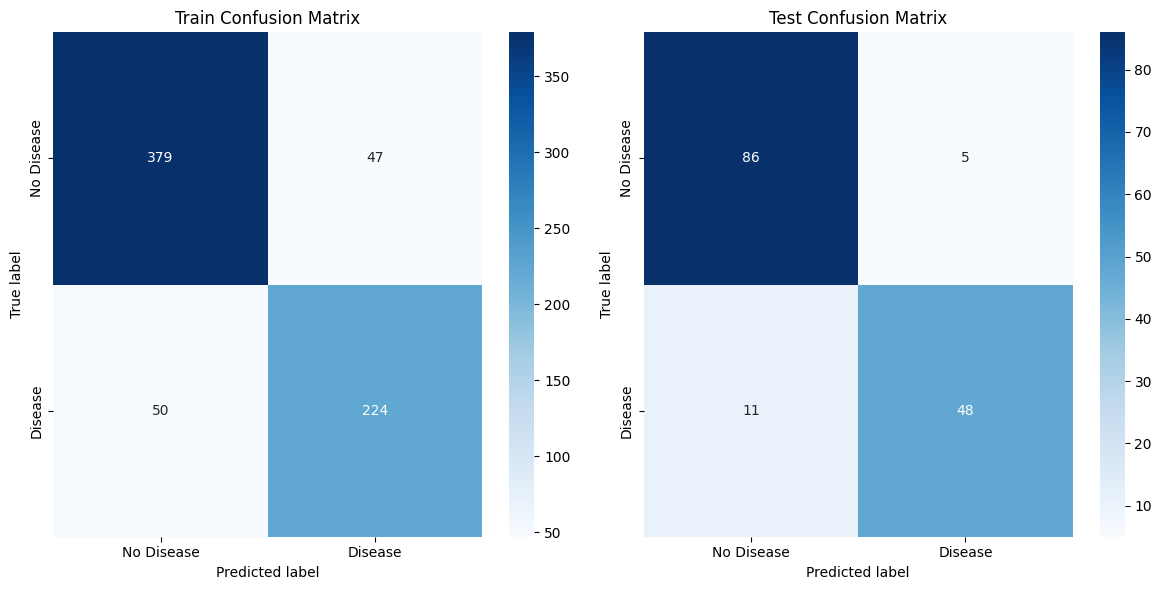

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Assuming y_train, y_train_pred, y_test, and y_test_pred are already defined

# Confusion Matrices for Train and Test sets
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Classification Report for the test set
cr = classification_report(y_test, y_test_pred)
print("Classification Report for Test Set:")
print(cr)

# Print Confusion Matrix for Train set
print("\nTrain Confusion Matrix:")
print(f"True Negatives (TN): {cm_train[0, 0]}")
print(f"False Positives (FP): {cm_train[0, 1]}")
print(f"False Negatives (FN): {cm_train[1, 0]}")
print(f"True Positives (TP): {cm_train[1, 1]}")

# Print Confusion Matrix for Test set
print("\nTest Confusion Matrix:")
print(f"True Negatives (TN): {cm_test[0, 0]}")
print(f"False Positives (FP): {cm_test[0, 1]}")
print(f"False Negatives (FN): {cm_test[1, 0]}")
print(f"True Positives (TP): {cm_test[1, 1]}")

# Plotting Confusion Matrices for both Train and Test sets
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Train Confusion Matrix
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'], ax=axes[0])
axes[0].set_title('Train Confusion Matrix')
axes[0].set_xlabel('Predicted label')
axes[0].set_ylabel('True label')

# Test Confusion Matrix
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'], ax=axes[1])
axes[1].set_title('Test Confusion Matrix')
axes[1].set_xlabel('Predicted label')
axes[1].set_ylabel('True label')

plt.tight_layout()
plt.show()


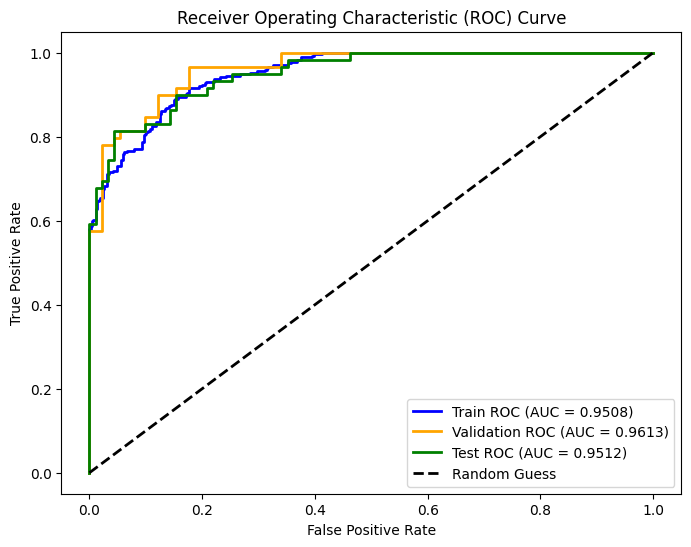

In [ ]:
from sklearn.metrics import roc_curve, auc

# ROC Curve for Train, Validation, and Test Data
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_proba)
fpr_val, tpr_val, _ = roc_curve(y_val, y_val_pred_proba)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_proba)

# Calculate AUC (Area Under the Curve)
roc_auc_train = auc(fpr_train, tpr_train)
roc_auc_val = auc(fpr_val, tpr_val)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Train ROC (AUC = {roc_auc_train:.4f})')
plt.plot(fpr_val, tpr_val, color='orange', lw=2, label=f'Validation ROC (AUC = {roc_auc_val:.4f})')
plt.plot(fpr_test, tpr_test, color='green', lw=2, label=f'Test ROC (AUC = {roc_auc_test:.4f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='--', lw=2, label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Save Model and Scaler
joblib.dump(model, 'logistic_regression_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
print("Model and scaler saved successfully!")

# Take user input interactively for prediction
print("\nPlease provide the following information:")

# Collect inputs from the user
age = int(input("Age (in years): "))
gender = int(input("Gender (0 for Male, 1 for Female): "))
cholesterol = int(input("Cholesterol level (mg/dL): "))
blood_pressure = int(input("Blood Pressure (mmHg): "))
heart_rate = int(input("Heart Rate (bpm): "))
smoking = int(input("Smoking (0 for Non-smoker, 1 for Current, 2 for Ex-smoker): "))
alcohol_intake = int(input("Alcohol Intake (0 for None, 1 for Moderate, 2 for Heavy): "))
exercise_hours = float(input("Exercise Hours per week: "))
family_history = int(input("Family History of heart disease (0 for No, 1 for Yes): "))
diabetes = int(input("Diabetes (0 for No, 1 for Yes): "))
obesity = int(input("Obesity (0 for No, 1 for Yes): "))
stress_level = int(input("Stress Level (1 to 10): "))
blood_sugar = int(input("Blood Sugar level (mg/dL): "))
exercise_angina = int(input("Exercise Induced Angina (0 for No, 1 for Yes): "))
chest_pain_type = int(input("Chest Pain Type (0 for Typical Angina, 1 for Atypical Angina, 2 for Non-Anginal Pain, 3 for Asymptomatic): "))

# Store the inputs in a dictionary
user_input = {
    'Age': age,
    'Gender': gender,
    'Cholesterol': cholesterol,
    'Blood Pressure': blood_pressure,
    'Heart Rate': heart_rate,
    'Smoking': smoking,
    'Alcohol Intake': alcohol_intake,
    'Exercise Hours': exercise_hours,
    'Family History': family_history,
    'Diabetes': diabetes,
    'Obesity': obesity,
    'Stress Level': stress_level,
    'Blood Sugar': blood_sugar,
    'Exercise Induced Angina': exercise_angina,
    'Chest Pain Type': chest_pain_type
}

# Convert input into a DataFrame
user_data = pd.DataFrame([user_input])

# Align the input features with the training data
user_data = user_data.reindex(columns=X.columns, fill_value=0)

# Scale the input data using the saved scaler
scaler = joblib.load('scaler.pkl')  # Load the saved scaler
scaled_data = scaler.transform(user_data)

# Load the trained model and predict the outcome
model = joblib.load('logistic_regression_model.pkl')  # Load the saved model
prediction = model.predict(scaled_data)
prediction_probability = model.predict_proba(scaled_data)[:, 1]

# Output the result
if prediction[0] == 1:
    print(f"\nPrediction: High risk of heart disease (Probability: {prediction_probability[0]:.2f})")
else:
   print(f"\nPrediction: Low risk of heart disease (Probability: {prediction_probability[0]:.2f})")

Model and scaler saved successfully!

Please provide the following information:
Age (in years): 59
Gender (0 for Male, 1 for Female): 0
Cholesterol level (mg/dL): 215
Blood Pressure (mmHg): 120
Heart Rate (bpm): 88
Smoking (0 for Non-smoker, 1 for Current, 2 for Ex-smoker): 1
Alcohol Intake (0 for None, 1 for Moderate, 2 for Heavy): 0
Exercise Hours per week: 5
Family History of heart disease (0 for No, 1 for Yes): 1
Diabetes (0 for No, 1 for Yes): 0
Obesity (0 for No, 1 for Yes): 1
Stress Level (1 to 10): 6
Blood Sugar level (mg/dL): 110
Exercise Induced Angina (0 for No, 1 for Yes): 0
Chest Pain Type (0 for Typical Angina, 1 for Atypical Angina, 2 for Non-Anginal Pain, 3 for Asymptomatic): 1

Prediction: Low risk of heart disease (Probability: 0.20)


In [ ]:
#cnn model

In [ ]:
import zipfile
import os

dataset_path = "/content/heartimages.zip"  # Path to your uploaded archive
extract_to = "/content/Contents"  # Folder to extract the dataset

with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print(f"Dataset extracted to {extract_to}")

Dataset extracted to /content/Contents


In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Function to collect all image file paths recursively
def collect_image_paths(directory):
    image_paths = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tiff')):
                image_paths.append(os.path.join(root, file))
    return image_paths

# Paths for the dataset
dataset_path = '/content/Contents'
output_path = '/content/split_dataset'

# Class directories (Sick, Normal)
class_dirs = ['Sick', 'Normal']

# Splitting ratios
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

# Ensure output directory exists
if not os.path.exists(output_path):
    os.makedirs(output_path)

# Split and copy files
for class_dir in class_dirs:
    class_path = os.path.join(dataset_path, class_dir)
    image_paths = collect_image_paths(class_path)

    # Check if there are enough files to split
    if len(image_paths) == 0:
        print(f"No images found in {class_path}. Skipping...")
        continue

    # Split the dataset
    train_files, temp_files = train_test_split(image_paths, test_size=(val_ratio + test_ratio), random_state=42)
    val_files, test_files = train_test_split(temp_files, test_size=(test_ratio / (val_ratio + test_ratio)), random_state=42)

    # Create output directories for the split
    for split, split_files in zip(['train', 'val', 'test'], [train_files, val_files, test_files]):
        split_dir = os.path.join(output_path, split, class_dir)
        os.makedirs(split_dir, exist_ok=True)
        for file_path in split_files:
            shutil.copy(file_path, split_dir)

print("Dataset split completed successfully!")

Dataset split completed successfully!


In [ ]:
import os
from sklearn.model_selection import train_test_split

# Function to split dataset
def split_dataset(dataset_path, output_path):
    for root, dirs, files in os.walk(dataset_path):
        if files:  # Only proceed if the directory contains files
            # Full paths for the files
            files = [os.path.join(root, file) for file in files if file.endswith('.jpg')]

            # Check if there are enough files to split
            if len(files) < 2:  # Minimum 2 files needed for splitting
                print(f"Only one file in directory {root}. Placing file directly in 'train' directory.")
                save_files(files, os.path.join(output_path, 'train'))
                continue

            # Split the files into train, val, and test sets
            try:
                train_files, temp_files = train_test_split(files, test_size=0.3, random_state=42)
                val_files, test_files = train_test_split(temp_files, test_size=0.5, random_state=42)

                # Save or copy files to output directories
                save_files(train_files, os.path.join(output_path, 'train'))
                save_files(val_files, os.path.join(output_path, 'val'))
                save_files(test_files, os.path.join(output_path, 'test'))
            except ValueError:
                # Handle case where splitting is not possible due to small number of files
                print(f"Skipping split for directory {root} as the number of files is too small.")
                save_files(files, os.path.join(output_path, 'train'))

# Function to save files (or copy)
def save_files(files, target_dir):
    os.makedirs(target_dir, exist_ok=True)
    for file in files:
        # Copy or move the file to the target directory
        # shutil.copy(file, target_dir)  # Uncomment to actually copy files
        print(f"File {file} -> {target_dir}")

# Paths
dataset_path = "/content/Contents/Normal"
output_path = "/content/split_dataset"

# Split the dataset
split_dataset(dataset_path, output_path)

File /content/Contents/Normal/Directory_3/series0015-Body/img0008--59.5766.jpg -> /content/split_dataset/train
File /content/Contents/Normal/Directory_3/series0015-Body/img0027--59.5766.jpg -> /content/split_dataset/train
File /content/Contents/Normal/Directory_3/series0015-Body/img0024--59.5766.jpg -> /content/split_dataset/train
File /content/Contents/Normal/Directory_3/series0015-Body/img0026--59.5766.jpg -> /content/split_dataset/train
File /content/Contents/Normal/Directory_3/series0015-Body/img0003--59.5766.jpg -> /content/split_dataset/train
File /content/Contents/Normal/Directory_3/series0015-Body/img0014--59.5766.jpg -> /content/split_dataset/train
File /content/Contents/Normal/Directory_3/series0015-Body/img0009--59.5766.jpg -> /content/split_dataset/train
File /content/Contents/Normal/Directory_3/series0015-Body/img0034--59.5766.jpg -> /content/split_dataset/train
File /content/Contents/Normal/Directory_3/series0015-Body/img0018--59.5766.jpg -> /content/split_dataset/train
F

In [ ]:
import os

def count_files_in_directory(directory):
    return sum([len(files) for r, d, files in os.walk(directory)])

train_dir = '/content/split_dataset/train'
val_dir = '/content/split_dataset/val'
test_dir = '/content/split_dataset/test'

print(f"Train files: {count_files_in_directory(train_dir)}")
print(f"Validation files: {count_files_in_directory(val_dir)}")
print(f"Test files: {count_files_in_directory(test_dir)}")

Train files: 926
Validation files: 277
Test files: 265


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 61.0MB/s]


Epoch 1/20, Train Loss: 0.2550, Train Accuracy: 90.28%, Val Loss: 0.1125, Val Accuracy: 95.67%
Epoch 2/20, Train Loss: 0.0547, Train Accuracy: 98.70%, Val Loss: 0.0530, Val Accuracy: 99.28%
Epoch 3/20, Train Loss: 0.0292, Train Accuracy: 99.24%, Val Loss: 0.0377, Val Accuracy: 99.28%
Epoch 4/20, Train Loss: 0.0067, Train Accuracy: 100.00%, Val Loss: 0.0367, Val Accuracy: 99.28%
Epoch 5/20, Train Loss: 0.0142, Train Accuracy: 99.68%, Val Loss: 0.0574, Val Accuracy: 98.92%
Epoch 6/20, Train Loss: 0.0167, Train Accuracy: 99.35%, Val Loss: 0.0423, Val Accuracy: 98.92%
Epoch 7/20, Train Loss: 0.0068, Train Accuracy: 99.68%, Val Loss: 0.0484, Val Accuracy: 98.92%
Epoch 8/20, Train Loss: 0.0018, Train Accuracy: 99.89%, Val Loss: 0.0465, Val Accuracy: 99.28%
Epoch 9/20, Train Loss: 0.0007, Train Accuracy: 100.00%, Val Loss: 0.0515, Val Accuracy: 99.28%
Epoch 10/20, Train Loss: 0.0011, Train Accuracy: 100.00%, Val Loss: 0.0552, Val Accuracy: 99.28%
Epoch 11/20, Train Loss: 0.0078, Train Accurac

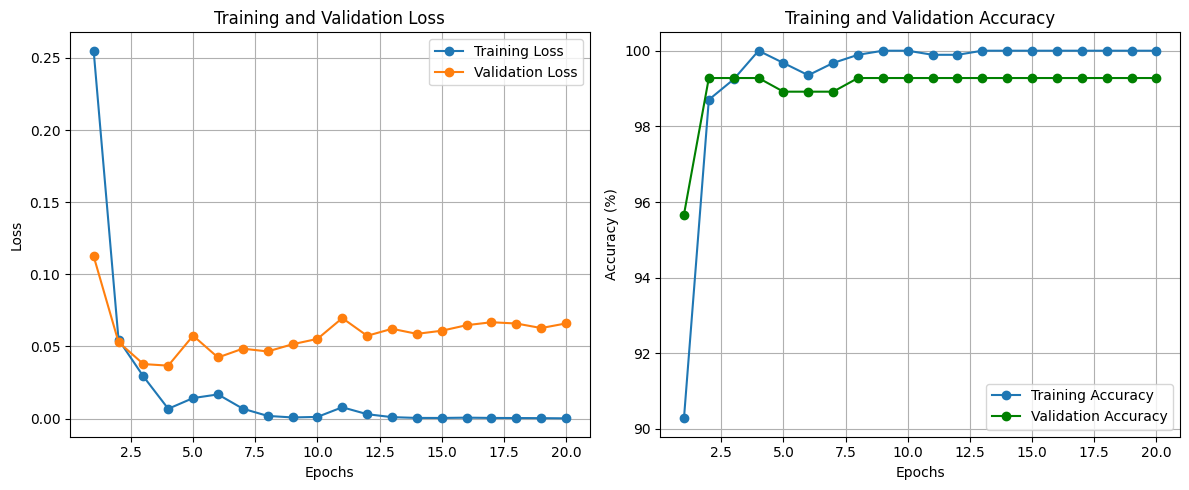

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms
from torchvision.datasets import ImageFolder
from sklearn.utils.class_weight import compute_class_weight
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt

# Set device for computation
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Dataset paths
train_dir = "/content/split_dataset/train"
val_dir = "/content/split_dataset/val"
test_dir = "/content/split_dataset/test"

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Load datasets
train_dataset = ImageFolder(train_dir, transform=transform)
val_dataset = ImageFolder(val_dir, transform=transform)
test_dataset = ImageFolder(test_dir, transform=transform)

# Create DataLoaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Initialize ResNet18 model
model = models.resnet18(weights='IMAGENET1K_V1')

# Modify the final fully connected layer
num_classes = len(train_dataset.classes)
model.fc = nn.Sequential(
    nn.Linear(model.fc.in_features, 512),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(512, num_classes)
)
model = model.to(device)

# Compute class weights to handle class imbalance
class_weights = compute_class_weight(
    'balanced',
    classes=np.arange(num_classes),
    y=train_dataset.targets
)
class_weights = torch.tensor(class_weights, dtype=torch.float32).to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Training loop
epochs = 20
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_train += (predicted == labels).sum().item()
        total_train += labels.size(0)

    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    train_accuracy = 100 * correct_train / total_train
    train_accuracies.append(train_accuracy)

    # Validation loop
    model.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct_val += (predicted == labels).sum().item()
            total_val += labels.size(0)

    val_loss /= len(val_loader)
    val_losses.append(val_loss)
    val_accuracy = 100 * correct_val / total_val
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, "
          f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%")

# Save the trained model
torch.save(model.state_dict(), 'resnet18_heart_disease_model.pth')
print("Model saved successfully as resnet18_heart_disease_model.pth!")

# Test the model
model.eval()
test_loss = 0.0
correct_test = 0
total_test = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_test += (predicted == labels).sum().item()
        total_test += labels.size(0)

test_loss /= len(test_loader)
test_accuracy = 100 * correct_test / total_test
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")

# Plot training and validation metrics
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), train_losses, label="Training Loss", marker='o')
plt.plot(range(1, epochs+1), val_losses, label="Validation Loss", marker='o')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), train_accuracies, label="Training Accuracy", marker='o')
plt.plot(range(1, epochs+1), val_accuracies, label="Validation Accuracy", marker='o', color='green')
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

<ipython-input-13-84a8e442d885>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('resnet18_heart_disease_model.pth', map_location=device))


Predicted Class: Sick


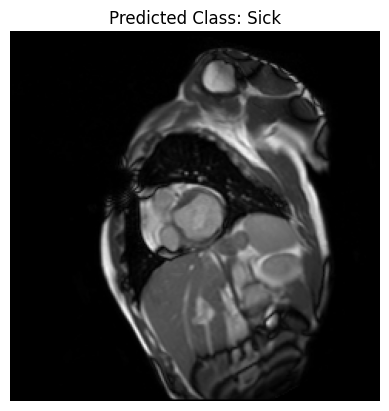

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

# Load the saved model
model.load_state_dict(torch.load('resnet18_heart_disease_model.pth', map_location=device))
model.eval()  # Set the model to evaluation mode

# Define the path to your sample image
sample_image_path = "/content/heart testimage.jpg"

# Load and preprocess the image
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

image = Image.open(sample_image_path).convert("RGB")  # Open the image and convert to RGB
input_tensor = transform(image).unsqueeze(0).to(device)  # Transform and add batch dimension

# Make a prediction
with torch.no_grad():
    outputs = model(input_tensor)
    _, predicted_class = torch.max(outputs, 1)  # Get the class index with the highest score

# Get the class label
predicted_label = train_dataset.classes[predicted_class.item()]

# Print the predicted class and display the image
print(f"Predicted Class: {predicted_label}")

# Display the image using matplotlib
plt.imshow(image)
plt.title(f"Predicted Class: {predicted_label}")
plt.axis("off")  # Turn off axis labels
plt.show()

<ipython-input-14-e33ddd1bf176>:26: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  resnet_model.load_state_dict(torch.load(resnet_model_path))


Please provide the following clinical information:
Age (in years): 78
Gender (0 for Male, 1 for Female): 0
Cholesterol level (mg/dL): 214
Blood Pressure (mmHg): 125
Heart Rate (bpm): 87
Smoking (0 for Non-smoker, 1 for Current, 2 for Ex-smoker): 1
Alcohol Intake (0 for None, 1 for Moderate, 2 for Heavy): 1
Exercise Hours per week: 4
Family History of heart disease (0 for No, 1 for Yes): 0
Diabetes (0 for No, 1 for Yes): 0
Obesity (0 for No, 1 for Yes): 1
Stress Level (1 to 10): 4
Blood Sugar level (mg/dL): 124
Exercise Induced Angina (0 for No, 1 for Yes): 0
Chest Pain Type (0 for Typical Angina, 1 for Atypical Angina, 2 for Non-Anginal Pain, 3 for Asymptomatic): 2
Enter the path to the chest X-ray image: /content/heart testimage.jpg

--- Prediction Results ---
Clinical Model High-Risk Probability: 0.87
Image Model High-Risk Probability: 0.94
Final Combined High-Risk Probability: 0.92
Predicted Risk Level: High Risk


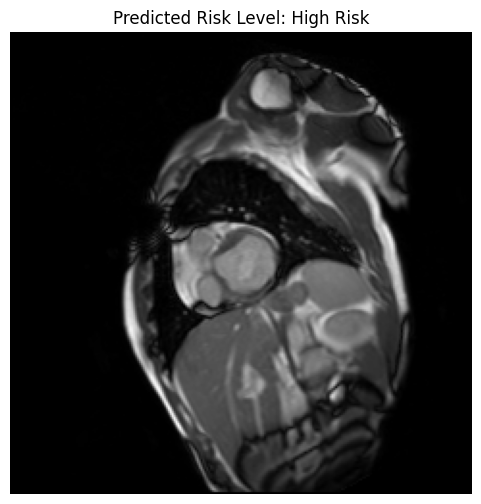

In [ ]:
import pandas as pd
import torch
from torchvision import transforms, models
from PIL import Image
import joblib
import matplotlib.pyplot as plt

# Paths to saved models and scaler
logistic_model_path = '/content/logistic_regression_model.pkl'
resnet_model_path = '/content/resnet18_heart_disease_model.pth'
scaler_path = '/content/scaler.pkl'

# Load the logistic regression model and scaler
logistic_model = joblib.load(logistic_model_path)
scaler = joblib.load(scaler_path)

# Load the ResNet model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
resnet_model = models.resnet18()
resnet_model.fc = torch.nn.Sequential(
    torch.nn.Linear(resnet_model.fc.in_features, 512),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.5),
    torch.nn.Linear(512, 2)
)
resnet_model.load_state_dict(torch.load(resnet_model_path))
resnet_model = resnet_model.to(device)
resnet_model.eval()

# Collect clinical inputs from the user
print("Please provide the following clinical information:")
age = int(input("Age (in years): "))
gender = int(input("Gender (0 for Male, 1 for Female): "))
cholesterol = int(input("Cholesterol level (mg/dL): "))
blood_pressure = int(input("Blood Pressure (mmHg): "))
heart_rate = int(input("Heart Rate (bpm): "))
smoking = int(input("Smoking (0 for Non-smoker, 1 for Current, 2 for Ex-smoker): "))
alcohol_intake = int(input("Alcohol Intake (0 for None, 1 for Moderate, 2 for Heavy): "))
exercise_hours = float(input("Exercise Hours per week: "))
family_history = int(input("Family History of heart disease (0 for No, 1 for Yes): "))
diabetes = int(input("Diabetes (0 for No, 1 for Yes): "))
obesity = int(input("Obesity (0 for No, 1 for Yes): "))
stress_level = int(input("Stress Level (1 to 10): "))
blood_sugar = int(input("Blood Sugar level (mg/dL): "))
exercise_angina = int(input("Exercise Induced Angina (0 for No, 1 for Yes): "))
chest_pain_type = int(input("Chest Pain Type (0 for Typical Angina, 1 for Atypical Angina, 2 for Non-Anginal Pain, 3 for Asymptomatic): "))

# Store clinical inputs in a DataFrame
clinical_input = pd.DataFrame([{
    'Age': age,
    'Gender': gender,
    'Cholesterol': cholesterol,
    'Blood Pressure': blood_pressure,
    'Heart Rate': heart_rate,
    'Smoking': smoking,
    'Alcohol Intake': alcohol_intake,
    'Exercise Hours': exercise_hours,
    'Family History': family_history,
    'Diabetes': diabetes,
    'Obesity': obesity,
    'Stress Level': stress_level,
    'Blood Sugar': blood_sugar,
    'Exercise Induced Angina': exercise_angina,
    'Chest Pain Type': chest_pain_type
}])

# Align input features with the trained model
clinical_input_scaled = scaler.transform(clinical_input)

# Predict with logistic regression
clinical_prediction_prob = logistic_model.predict_proba(clinical_input_scaled)[0]  # Probability for both classes
clinical_risk_score = clinical_prediction_prob[1]  # High-risk probability

# Take image input
image_path = input("Enter the path to the chest X-ray image: ")
image = Image.open(image_path).convert("RGB")

# Preprocess the image
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])
image_tensor = transform(image).unsqueeze(0).to(device)

# Predict with ResNet model
with torch.no_grad():
    image_prediction = resnet_model(image_tensor)
    image_prediction_prob = torch.nn.functional.softmax(image_prediction, dim=1).cpu().numpy()[0]
image_risk_score = image_prediction_prob[1]  # High-risk probability from image model

# Combine predictions
final_risk_score = 0.3 * clinical_risk_score + 0.7 * image_risk_score
risk_level = "High Risk" if final_risk_score > 0.5 else "Low Risk"

# Display results
print("\n--- Prediction Results ---")
print(f"Clinical Model High-Risk Probability: {clinical_risk_score:.2f}")
print(f"Image Model High-Risk Probability: {image_risk_score:.2f}")
print(f"Final Combined High-Risk Probability: {final_risk_score:.2f}")
print(f"Predicted Risk Level: {risk_level}")

# Show the input image
plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.axis('off')
plt.title(f"Predicted Risk Level: {risk_level}")
plt.show()